In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [ ]:
#### Loard the california data sate
california_housing = fetch_california_housing()

In [ ]:
california_housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
x = x[["MedInc","AveBedrms"]]

In [ ]:
x.head()

,MedInc,AveBedrms
0,8.3252,1.023810
1,8.3014,0.971880
2,7.2574,1.073446
3,5.6431,1.073059
4,3.8462,1.081081


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train.head()

,MedInc,AveBedrms
14196,3.2596,1.006421
8267,3.8125,1.041005
17445,4.1563,0.985119
14265,1.9425,1.033803
2271,3.5542,1.134211


In [ ]:
y_train.head()

,0
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([1.14995892, 1.50581987, 1.90366136, ..., 4.31521219, 1.61289471,
       1.93435877])

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
20046,0.47700,1.149959
3024,0.45800,1.505820
15663,5.00001,1.903661
20484,2.18600,2.850747
9814,2.78000,2.006871
...,...,...
15362,2.63300,2.375712
16623,2.66800,1.587495
18086,5.00001,4.315212
2144,0.72300,1.612895


In [ ]:
lr.score(x_test, y_test)

0.4588993692089419

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


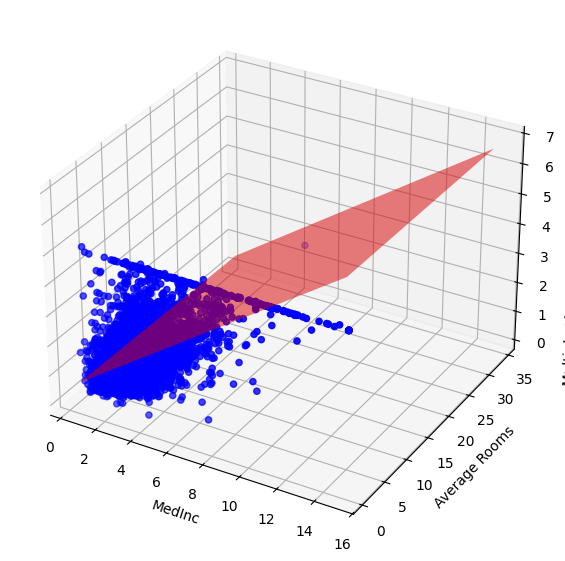

In [ ]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test['MedInc'], x_test['AveBedrms'], y_test, c='blue',label = 'Actual Data')

x1_range = np.linspace(x_test['MedInc'].min(),x_test['MedInc'].max(), 100)
x2_range = np.linspace(x_test['AveBedrms'].min(), x_test['AveBedrms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)



z = lr.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)



ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('MedInc')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('Multiple Linner Rergression Best Fit line(3D)')
plt.show()